In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv(r"general_data-Copy1.csv")

In [8]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [9]:
data.shape

(4410, 24)

In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Total Working Years and NumCompaniesWorked have null values

<Axes: ylabel='Frequency'>

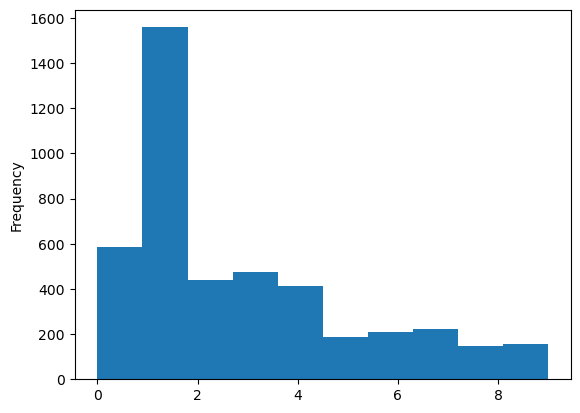

In [11]:
data["NumCompaniesWorked"].plot(kind="hist")

<Axes: ylabel='Frequency'>

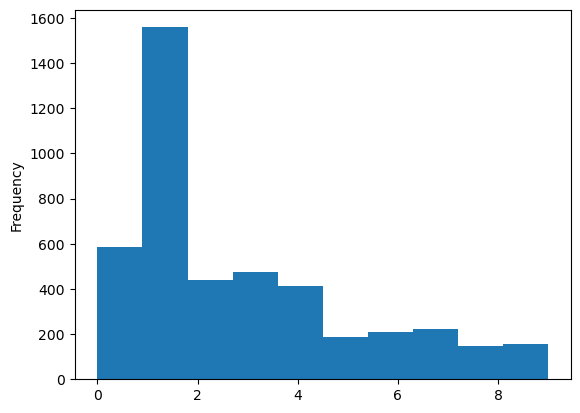

In [12]:
data["Mode"]=data["NumCompaniesWorked"].fillna(data["NumCompaniesWorked"].mode([0]))
data["Mode"].plot(kind="hist")

In [13]:
data["NumCompaniesWorked"]=data["NumCompaniesWorked"].fillna(data["NumCompaniesWorked"].mode()[0])

In [14]:
data["TotalWorkingYears"].corr(data["YearsAtCompany"])

0.6277031466021694

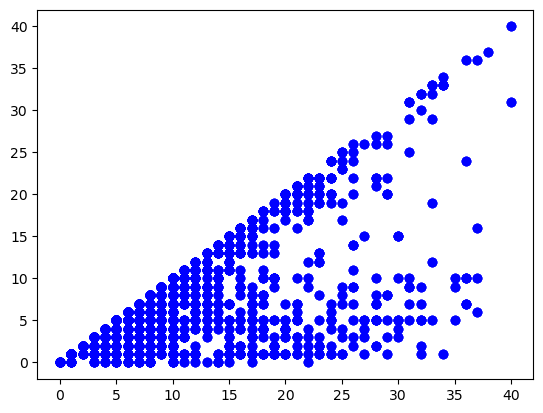

In [15]:
plt.scatter(data["TotalWorkingYears"],data["YearsAtCompany"] , label='Data Points', color='b', marker='o')

In [16]:
##since years at company and total working years are correlated,imputing by grouped mean
data["TotalWorkingYears"]=data.groupby("YearsAtCompany")["TotalWorkingYears"].transform(lambda x:x.fillna(x.mean()))

In [21]:
data=data.drop(columns=["Mode"])

In [22]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [23]:
manager=pd.read_csv(r"manager_survey_data-Copy1.csv")

In [24]:
manager.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [25]:
manager.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


We have no null values in manager data

In [26]:
employee=pd.read_csv(r"employee_survey_data-Copy1.csv")

In [27]:
employee.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [28]:
employee.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [29]:
employee.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

<Axes: ylabel='Frequency'>

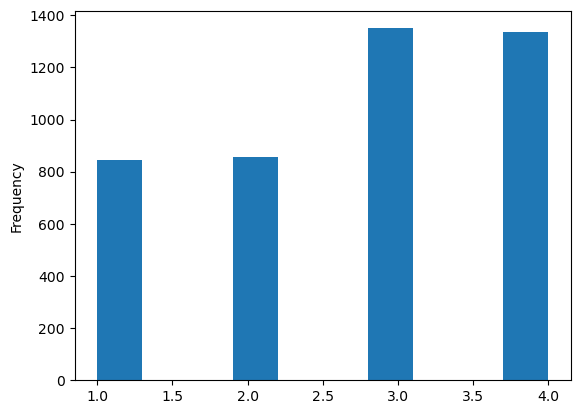

In [30]:
#EnvironmentSatisfaction
employee["EnvironmentSatisfaction"].plot(kind="hist")

<Axes: ylabel='Frequency'>

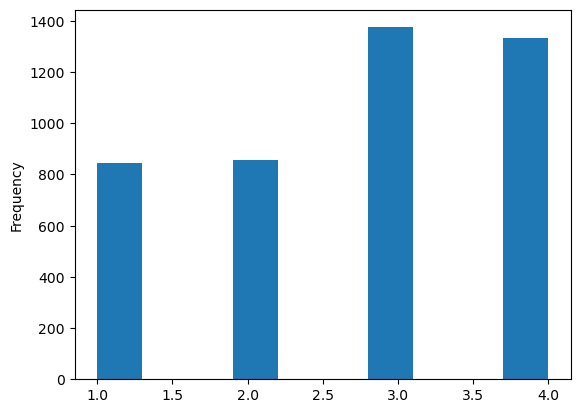

In [31]:
Emedian=employee["EnvironmentSatisfaction"].fillna(employee["EnvironmentSatisfaction"].median())
Emedian.plot(kind="hist")

In [32]:
employee["EnvironmentSatisfaction"]=employee["EnvironmentSatisfaction"].fillna(employee["EnvironmentSatisfaction"].median())

<Axes: ylabel='Frequency'>

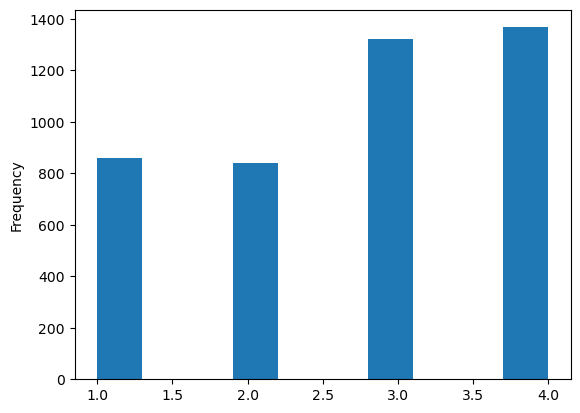

In [33]:
#JobSatisfaction
employee["JobSatisfaction"].plot(kind="hist")

<Axes: ylabel='Frequency'>

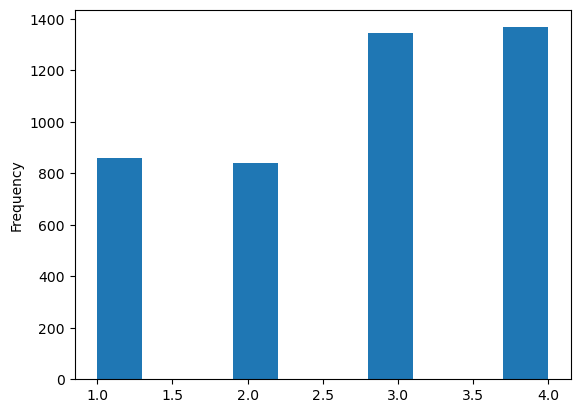

In [34]:
jmedian=employee["JobSatisfaction"].fillna(employee["JobSatisfaction"].median())
jmedian.plot(kind="hist")

In [35]:
employee["JobSatisfaction"]=employee["JobSatisfaction"].fillna(employee["JobSatisfaction"].median())

<Axes: ylabel='Frequency'>

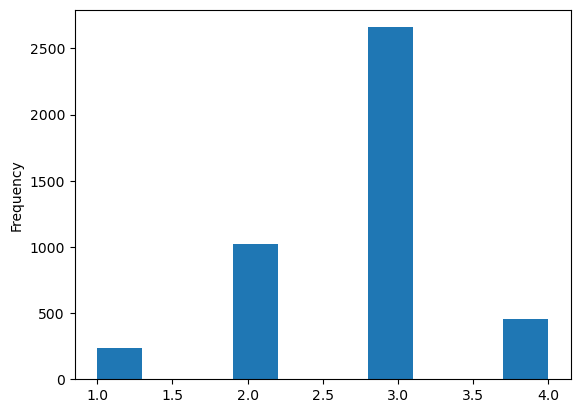

In [36]:
#worklifebalance
employee["WorkLifeBalance"].plot(kind="hist")

<Axes: ylabel='Frequency'>

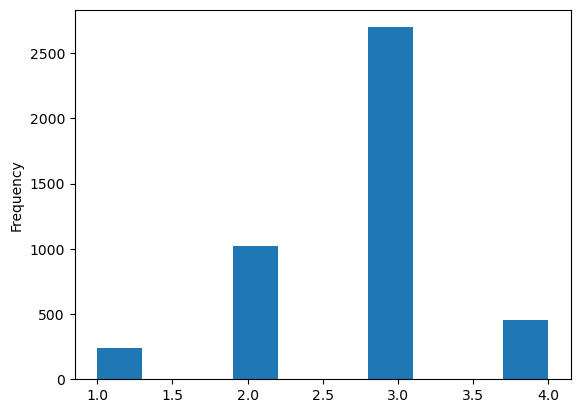

In [37]:
wmedian=employee["WorkLifeBalance"].fillna(employee["WorkLifeBalance"].median())
wmedian.plot(kind="hist")

In [38]:
employee["WorkLifeBalance"]=employee["WorkLifeBalance"].fillna(employee["WorkLifeBalance"].median())

In [39]:
employee.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [40]:
merged_df = pd.merge(manager, employee, on='EmployeeID', how='inner')

In [41]:
merged_df.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [42]:
merged_df["TotalSatisfaction"]=(merged_df['EnvironmentSatisfaction'] + 
                            merged_df['JobInvolvement'] + 
                            merged_df['JobSatisfaction'] + 
                            merged_df['PerformanceRating'] +
                            merged_df['WorkLifeBalance']) /5 


In [43]:
new_df =merged_df

In [44]:
new_df = new_df.drop(columns=["JobInvolvement","PerformanceRating","EnvironmentSatisfaction","JobSatisfaction","WorkLifeBalance"])

In [45]:
final = pd.merge(data,new_df , on='EmployeeID', how='inner')

In [ ]:
final.to_csv('final.csv')

# FINAL DATAFRAME

In [2]:
final=pd.read_csv(r"final.csv")

In [3]:
final.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,Y,11,8,0,1.0,6,1,0,0,3.0
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,Y,23,8,1,6.0,3,5,1,4,3.0
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,Y,15,8,3,5.0,2,5,0,3,2.2
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,Y,11,8,3,13.0,5,8,7,5,3.2
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,Y,12,8,2,9.0,2,6,0,4,2.8


In [29]:
 final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   EmployeeID               4410 non-null   int64  
 10  Gender                   4410 non-null   object 
 11  JobLevel                 4410 non-null   int64  
 12  JobRole                  4410 non-null   object 
 13  MaritalStatus            4410 non-null   object 
 14  MonthlyIncome           

## EDA

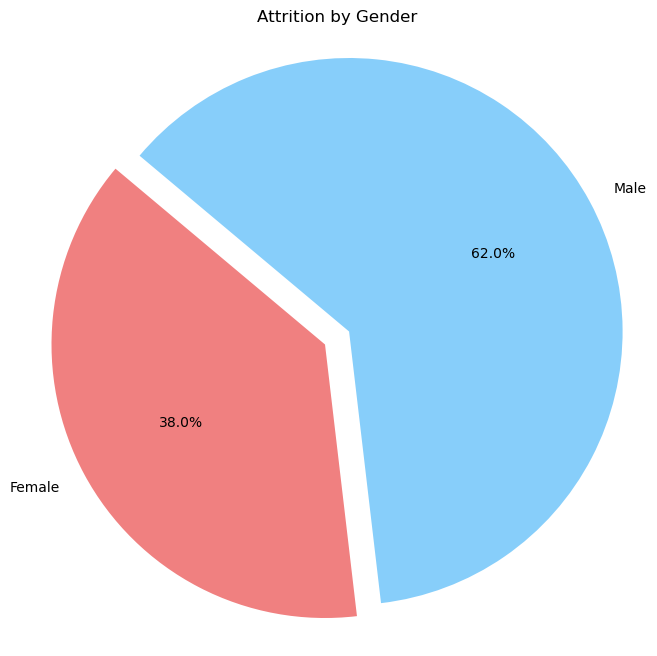

In [30]:
import matplotlib.pyplot as plt

# Group the data by 'Gender' and 'Attrition' and count the number of employees in each category
gender_attrition_counts = final.groupby(['Gender', 'Attrition']).size().unstack()

# Plot a pie chart
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightskyblue']
labels = gender_attrition_counts.index
explode = (0.1, 0) 

plt.pie(gender_attrition_counts['Yes'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Attrition by Gender')
plt.axis('equal')  

plt.show()


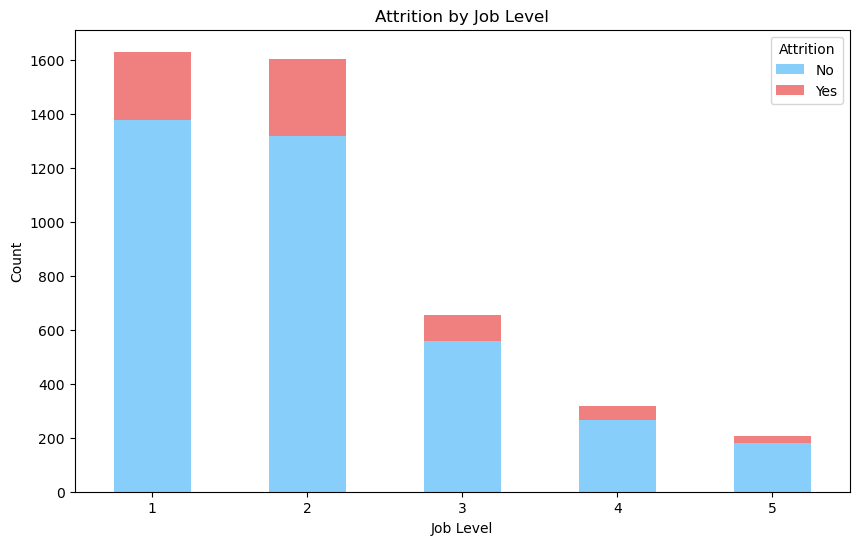

In [31]:


# Group the data by 'JobLevel' and 'Attrition' and count the number of employees in each category
joblevel_attrition_counts = final.groupby(['JobLevel', 'Attrition']).size().unstack()

# Plot a bar chart
ax = joblevel_attrition_counts.plot(kind='bar', stacked=True, color=['lightskyblue', 'lightcoral'], figsize=(10, 6))
plt.title('Attrition by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Count')
plt.xticks(rotation=0)  # To keep the x-axis labels horizontal

# Add a legend
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])

plt.show()


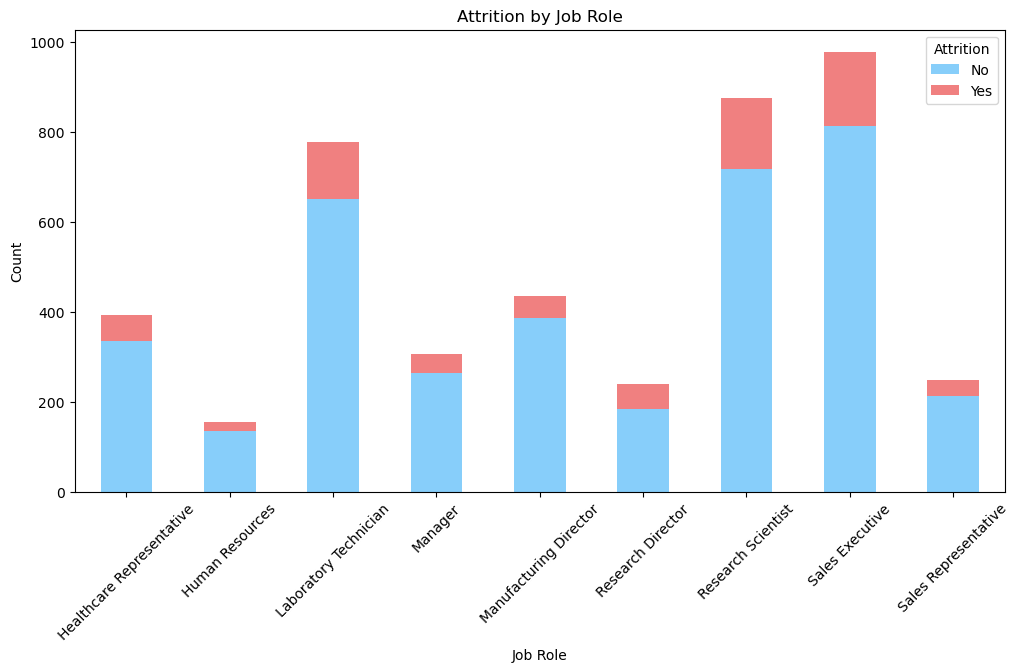

In [32]:


# Group the data by 'JobRole' and 'Attrition' and count the number of employees in each category
jobrole_attrition_counts = final.groupby(['JobRole', 'Attrition']).size().unstack()

# Plot a bar chart
ax = jobrole_attrition_counts.plot(kind='bar', stacked=True, color=['lightskyblue', 'lightcoral'], figsize=(12, 6))
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title='Attrition', loc='upper right', labels=['No', 'Yes'])

plt.show()


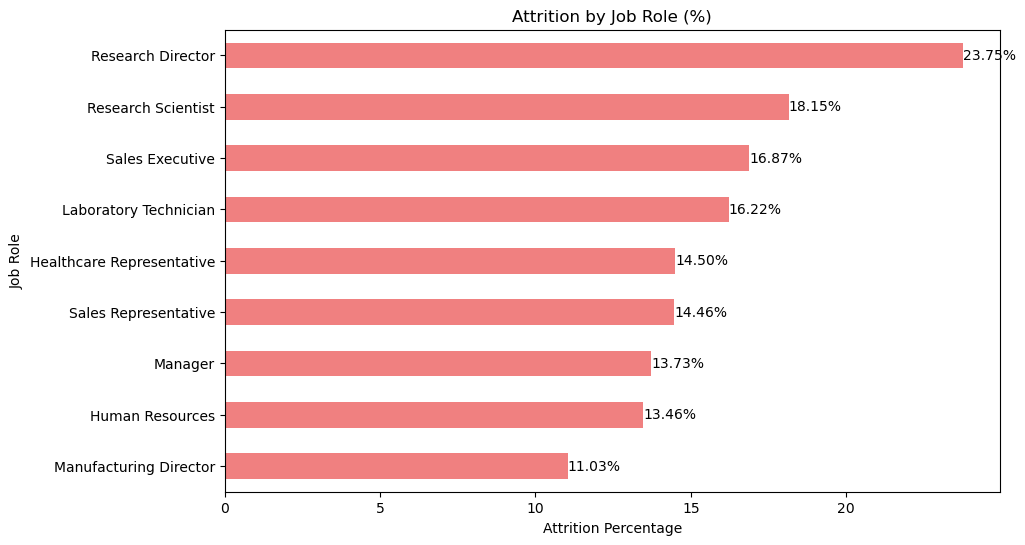

In [33]:
import matplotlib.pyplot as plt

# Group the data by 'JobRole' and 'Attrition' and count the number of employees in each category
jobrole_attrition_counts = final.groupby(['JobRole', 'Attrition']).size().unstack()

# Calculate the percentage of Attrition for each JobRole
jobrole_attrition_percentages = (jobrole_attrition_counts['Yes'] / jobrole_attrition_counts.sum(axis=1)) * 100

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
jobrole_attrition_percentages.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Attrition by Job Role (%)')
plt.xlabel('Attrition Percentage')
plt.ylabel('Job Role')

# Add percentage labels to the bars
for index, value in enumerate(jobrole_attrition_percentages.sort_values(ascending=True)):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.show()


In [5]:
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'MaritalStatus' and 'Attrition'
# Group the data by 'MaritalStatus' and 'Attrition' and count the number of employees in each category
marital_attrition_counts = final.groupby(['MaritalStatus', 'Attrition']).size().unstack()


# Create a new DataFrame with the hierarchical structure needed for the Sunburst chart
data = pd.DataFrame(columns=["MaritalStatus", "Attrition", "Count"])

for marital_status in marital_attrition_counts.index:
    data = data.append({"MaritalStatus": marital_status, "Attrition": "No", "Count": marital_attrition_counts.loc[marital_status, "No"]}, ignore_index=True)
    data = data.append({"MaritalStatus": marital_status, "Attrition": "Yes", "Count": marital_attrition_counts.loc[marital_status, "Yes"]}, ignore_index=True)

# Create the Sunburst chart
fig = px.sunburst(data, path=['MaritalStatus', 'Attrition'], values='Count')

# Customize the chart appearance if needed
fig.update_layout(title='Attrition by Marital Status Sunburst Chart')

# Show the chart
fig.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_21212\2932405541.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_21212\2932405541.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_21212\2932405541.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_21212\2932405541.py:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_21212\2932405541.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



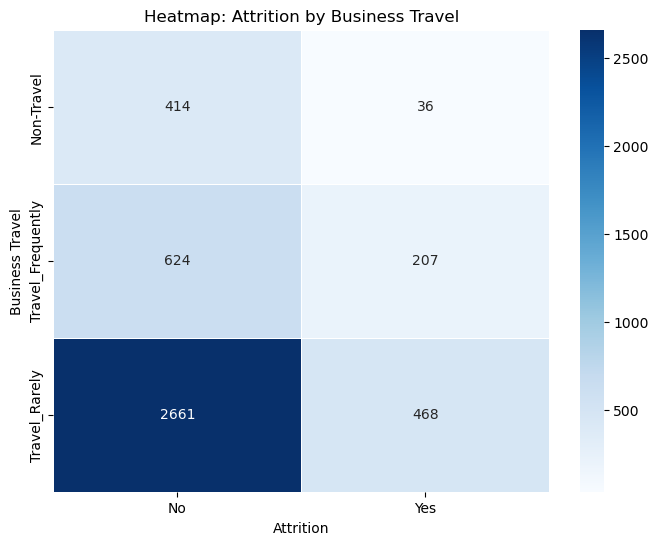

In [35]:


# Create a pivot table to count the number of employees in each category
pivot_table = final.pivot_table(index='BusinessTravel', columns='Attrition', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar=True, linewidths=0.5)

plt.title('Heatmap: Attrition by Business Travel')
plt.xlabel('Attrition')
plt.ylabel('Business Travel')

plt.show()


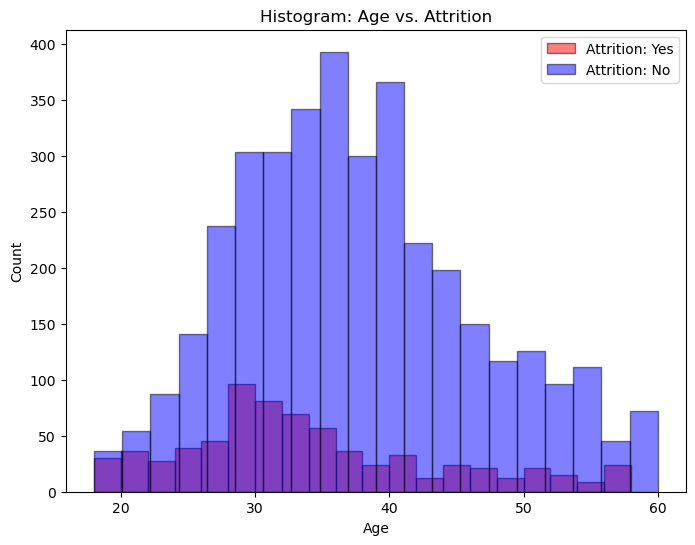

In [37]:


# Filter the DataFrame to separate employees with and without attrition
attrition_yes = final[final['Attrition'] == 'Yes']
attrition_no = final[final['Attrition'] == 'No']

# Create histograms for the Age column
plt.figure(figsize=(8, 6))
plt.hist(attrition_yes['Age'], bins=20, alpha=0.5, color='red', label='Attrition: Yes', edgecolor='black')
plt.hist(attrition_no['Age'], bins=20, alpha=0.5, color='blue', label='Attrition: No', edgecolor='black')

plt.title('Histogram: Age vs. Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1935139303.py:6: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



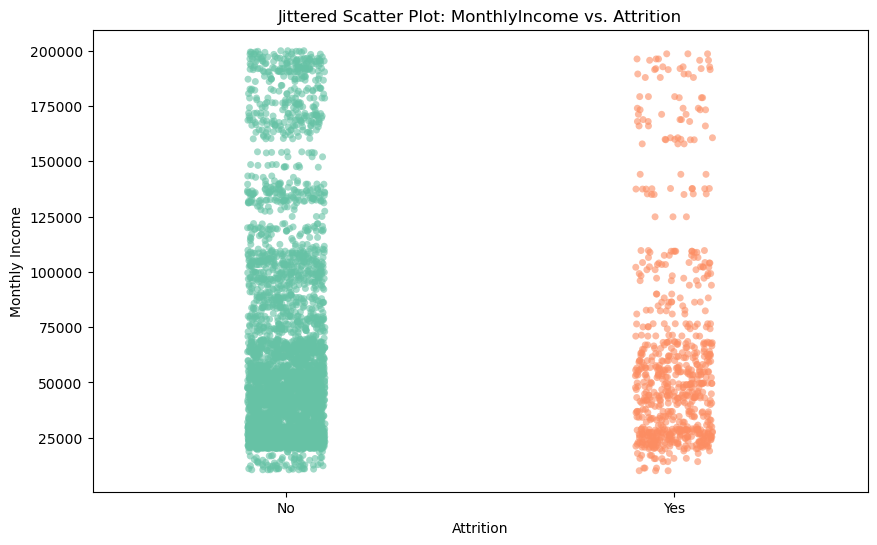

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jittered scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Attrition', y='MonthlyIncome', data=final, jitter=True, palette="Set2", alpha=0.6)

plt.title('Jittered Scatter Plot: MonthlyIncome vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

plt.show()


In [6]:
import plotly.express as px

# Create a pivot table to count the number of employees in each category
pivot_table = final.pivot_table(index='EducationField', columns='Attrition', aggfunc='size', fill_value=0)

# Create a new DataFrame with the hierarchical structure needed for the Sunburst chart
data = []
for education_field in pivot_table.index:
    attrition_counts = pivot_table.loc[education_field]
    data.append({'EducationField': education_field, 'Attrition': 'No', 'Count': attrition_counts['No']})
    data.append({'EducationField': education_field, 'Attrition': 'Yes', 'Count': attrition_counts['Yes']})

# Create the Sunburst chart
fig = px.sunburst(data, path=['EducationField', 'Attrition'], values='Count')

# Customize the chart appearance if needed
fig.update_layout(title='Attrition by Education Field Sunburst Chart')

# Show the chart
fig.show()


<Figure size 1000x600 with 0 Axes>

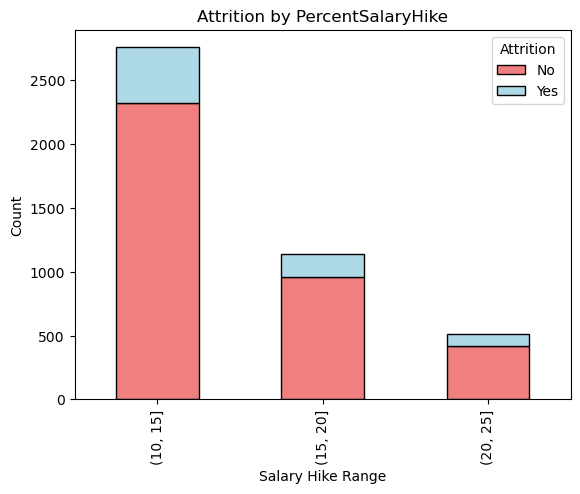

In [51]:
import matplotlib.pyplot as plt

# Define bins for grouping PercentSalaryHike values
bins = [10, 15, 20, 25]

# Create a new column that assigns each value of PercentSalaryHike to its corresponding bin
final['SalaryHikeGroup'] = pd.cut(final['PercentSalaryHike'], bins)

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
cross_tab = final.groupby(['SalaryHikeGroup', 'Attrition']).size().unstack()
cross_tab.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], edgecolor='black')

plt.title('Attrition by PercentSalaryHike')
plt.xlabel('Salary Hike Range')
plt.ylabel('Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.show()


In [50]:
final["PercentSalaryHike"].value_counts()

11    630
13    627
14    603
12    594
15    303
18    267
17    246
16    234
19    228
22    168
20    165
21    144
23     84
24     63
25     54
Name: PercentSalaryHike, dtype: int64

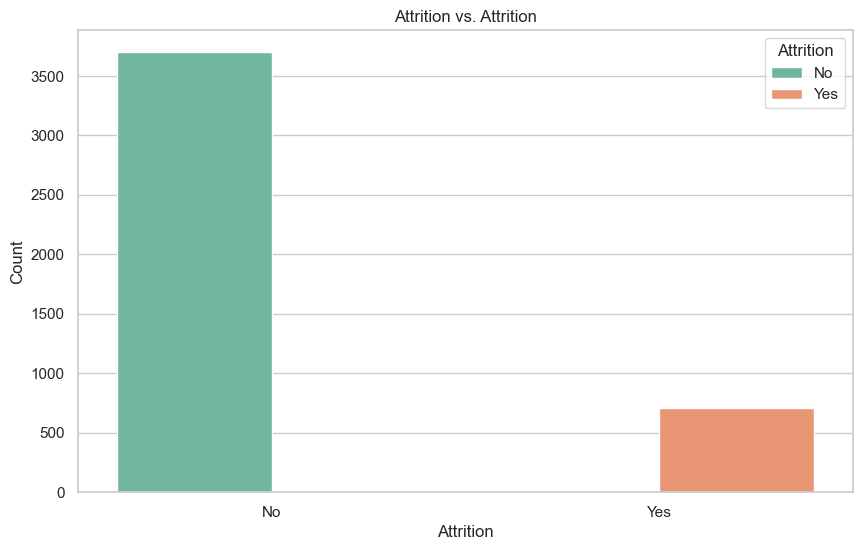

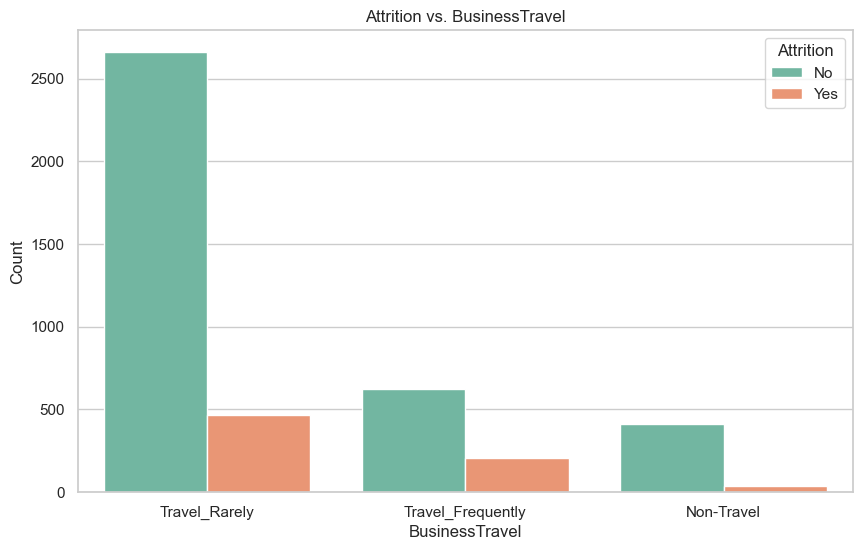

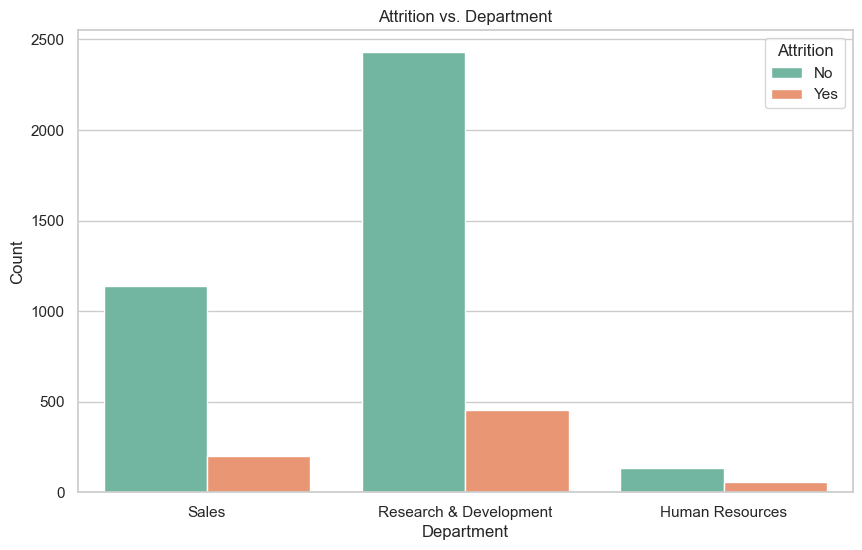

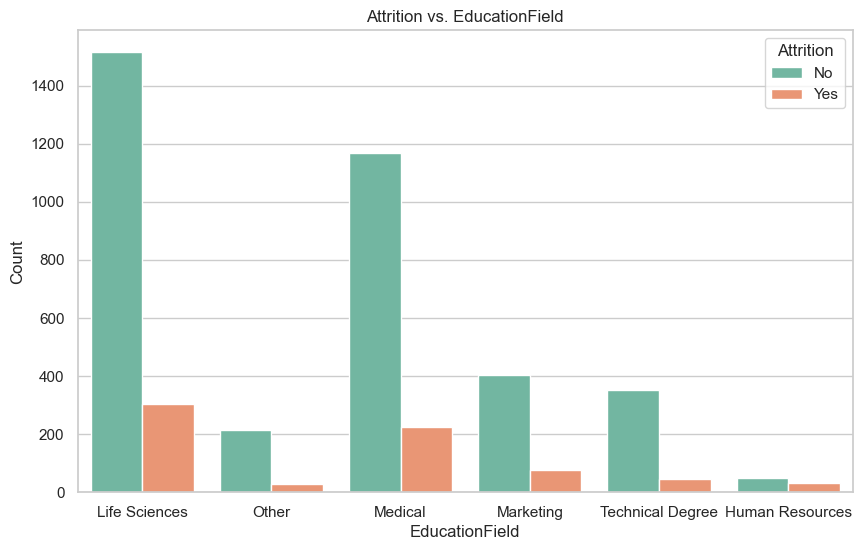

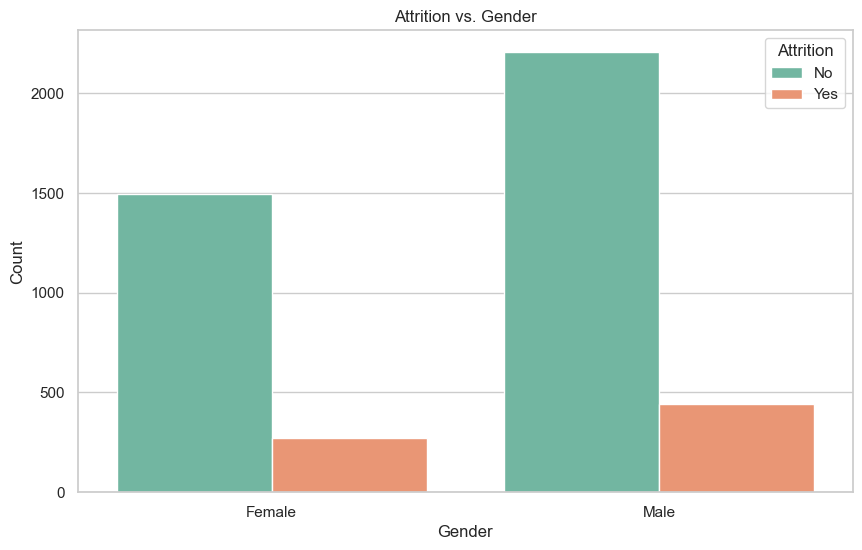

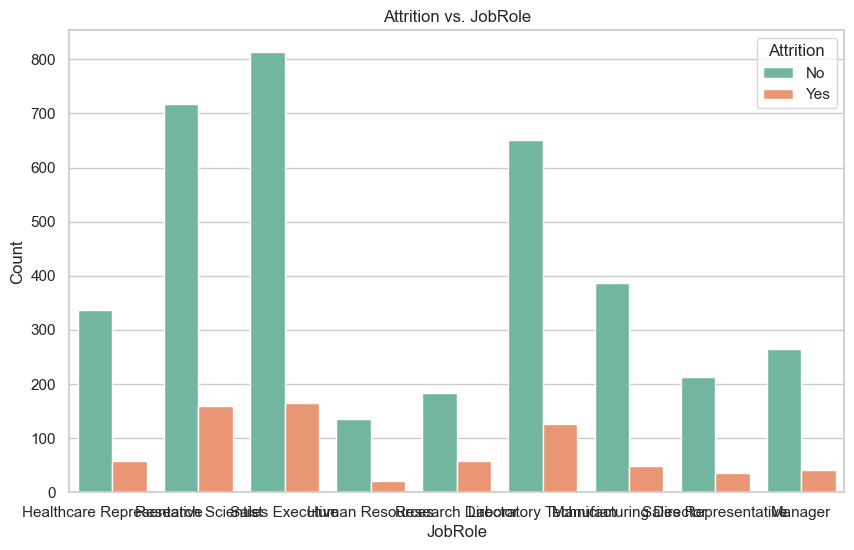

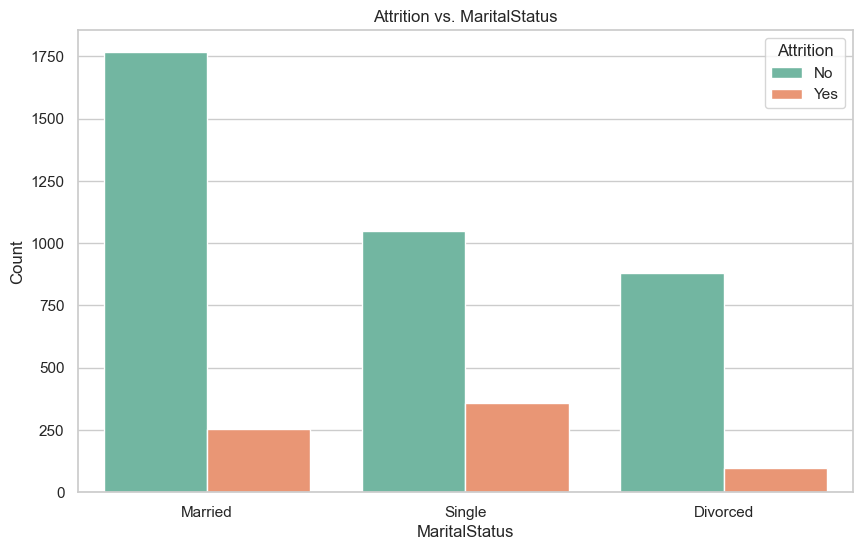

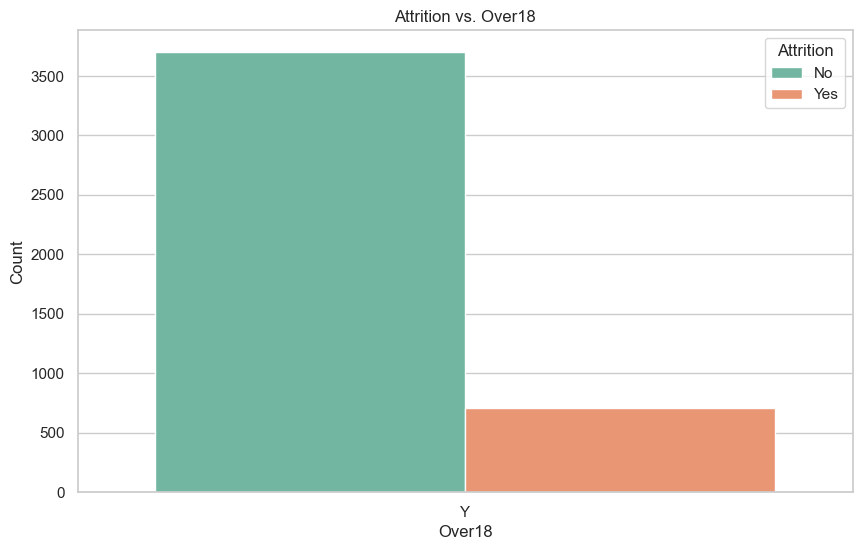

In [9]:
for i in final.columns:
    if final[i].dtype=="O":
        plt.figure(figsize=(10, 6))
        sns.set(style="whitegrid")
        sns.countplot(data=final, x=i, hue='Attrition', palette="Set2")
        plt.title(f'Attrition vs. {i}')
        plt.xlabel(f'{i}')
        plt.ylabel('Count')
        plt.legend(title="Attrition", loc='upper right')

        plt.show()

In [58]:
data=final.drop(columns=["Unnamed: 0","EmployeeCount","Over18","YearsWithCurrManager"])

In [59]:
data.shape

(4410, 23)

In [60]:
data.drop(columns=["StandardHours"],inplace=True)

In [61]:
data.drop(columns=["EmployeeID"],inplace=True)

In [62]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,TotalSatisfaction,SalaryHikeGroup
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,11,0,1.0,6,1,0,3.0,"(10, 15]"
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,23,1,6.0,3,5,1,3.0,"(20, 25]"
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,15,3,5.0,2,5,0,2.2,"(10, 15]"
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,11,3,13.0,5,8,7,3.2,"(10, 15]"
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,12,2,9.0,2,6,0,2.8,"(10, 15]"


In [63]:
data['BusinessTravel'] = data['BusinessTravel'].replace('Travel_Rarely',2)
data['BusinessTravel'] = data['BusinessTravel'].replace('Travel_Frequently',3)
data['BusinessTravel'] = data['BusinessTravel'].replace('Non-Travel',4)

data['Attrition'] = data['Attrition'].replace('Yes',1)
data['Attrition'] = data['Attrition'].replace('No',0)



data['Gender'] = data['Gender'].replace('Male',1)
data['Gender'] = data['Gender'].replace('Female',0)

data['MaritalStatus'] = data['MaritalStatus'].replace('Single',1)
data['MaritalStatus'] = data['MaritalStatus'].replace('Married',2)
data['MaritalStatus'] = data['MaritalStatus'].replace('Divorced',3)

data['Department'] = data['Department'].replace('Sales',1)
data['Department'] = data['Department'].replace('Human Resources',2)
data['Department'] = data['Department'].replace('Research & Development',3)

data['EducationField'] = data['EducationField'].replace('Life Sciences',1)
data['EducationField'] = data['EducationField'].replace('Medical',2)
data['EducationField'] = data['EducationField'].replace('Marketing',3)
data['EducationField'] = data['EducationField'].replace('Technical Degree',4)
data['EducationField'] = data['EducationField'].replace('Human Resources',5)
data['EducationField'] = data['EducationField'].replace('Other',0)

data['JobRole'] = data['JobRole'].replace('Sales Executive',1)
data['JobRole'] = data['JobRole'].replace('Manufacturing Director',2)
data['JobRole'] = data['JobRole'].replace('Healthcare Representative',3)
data['JobRole'] = data['JobRole'].replace('Manager',4)
data['JobRole'] = data['JobRole'].replace('Research Director',5)
data['JobRole'] = data['JobRole'].replace('Laboratory Technician',6)
data['JobRole'] = data['JobRole'].replace('Sales Representative',7)
data['JobRole'] = data['JobRole'].replace('Research Scientist',8)
data['JobRole'] = data['JobRole'].replace('Human Resources',9)



In [64]:
data['Department'].value_counts()

3    2883
1    1338
2     189
Name: Department, dtype: int64

In [65]:
data['JobRole'].value_counts()

1    978
8    876
6    777
2    435
3    393
4    306
7    249
5    240
9    156
Name: JobRole, dtype: int64

In [66]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,TotalSatisfaction,SalaryHikeGroup
0,51,0,2,1,6,2,1,0,1,3,...,131160,1.0,11,0,1.0,6,1,0,3.0,"(10, 15]"
1,31,1,3,3,10,1,1,0,1,8,...,41890,0.0,23,1,6.0,3,5,1,3.0,"(20, 25]"
2,32,0,3,3,17,4,0,1,4,1,...,193280,1.0,15,3,5.0,2,5,0,2.2,"(10, 15]"
3,38,0,4,3,2,5,1,1,3,9,...,83210,3.0,11,3,13.0,5,8,7,3.2,"(10, 15]"
4,32,0,2,3,10,1,2,1,1,1,...,23420,4.0,12,2,9.0,2,6,0,2.8,"(10, 15]"


In [70]:

correlation = data.drop(columns=['Attrition']).corrwith(data['Attrition'])
print(correlation)


Age                       -0.159205
BusinessTravel            -0.000074
Department                 0.001963
DistanceFromHome          -0.009730
Education                 -0.015111
EducationField             0.016454
Gender                     0.018125
JobLevel                  -0.010290
JobRole                    0.019491
MaritalStatus             -0.162070
MonthlyIncome             -0.031176
NumCompaniesWorked         0.041797
PercentSalaryHike          0.032533
StockOptionLevel          -0.006839
TotalWorkingYears         -0.170587
TrainingTimesLastYear     -0.049431
YearsAtCompany            -0.134392
YearsSinceLastPromotion   -0.033019
TotalSatisfaction         -0.143399
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1087860089.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<h2>OBSERVATIONS</h2>

In [ ]:
#The features department,gender,education field,numcompanies worked,percentsalaryhike,jobrole are positively correlated with attrition
# with gender,male have more attrition rate of 68%
# with Jobrole,research director and reseach scientist have high attrition rate
# in joblevel,level 2 is having high attrition rate
# singles have high attrition count when compared to marreied and divorced
# Who are travelling rarely in buisness trip have more attrition
# The agegroup from 25 to 35 have high attrition rate
# persons with low income have high attrition
# Those who are from life science and medical are highly leaving the job


<h4> The Management has to increase the monthly income and the percent of salary hike to decrease the attrition rate.</h4>

# MODEL BUILDING

In [13]:
y = data['Attrition']
X = data.drop(columns=['Attrition'])

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train  , x_test , y_train, y_test = train_test_split (X ,y,test_size = 0.2 , random_state = 0)

In [68]:
data["Attrition"].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [69]:
#Since the data is imbalanced,we go with smote 

# SMOTE

In [16]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(max_iter=10000)
log_reg.fit(smote_train, smote_target)
y_pred_lg = log_reg.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred_lg))

accuracy 0.6201814058956916


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)
y_pred = rfc.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

accuracy 0.9965986394557823


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [39]:
print(classification_report(y_test, y_pred))
print( confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           1       1.00      0.98      0.99       141

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

[[741   0]
 [  3 138]]


# Gradient Boosting

In [41]:
from sklearn.ensemble import  GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(smote_train, smote_target)

gb_predictions = gb.predict(x_test)
print('accuracy',metrics.accuracy_score(y_test, gb_predictions))

accuracy 0.8684807256235828


In [42]:
print(classification_report(y_test,gb_predictions ))
print( confusion_matrix(y_test,gb_predictions))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       741
           1       0.57      0.77      0.65       141

    accuracy                           0.87       882
   macro avg       0.76      0.83      0.78       882
weighted avg       0.89      0.87      0.88       882

[[658  83]
 [ 33 108]]


# Decision  Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



decision_tree = DecisionTreeClassifier(max_depth=5,random_state=0)
decision_tree.fit(smote_train, smote_target)


y_pred = decision_tree.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7494331065759637
Confusion Matrix:
[[571 166]
 [ 55  90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       737
           1       0.35      0.62      0.45       145

    accuracy                           0.75       882
   macro avg       0.63      0.70      0.64       882
weighted avg       0.82      0.75      0.77       882



In [19]:
smote_train

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,TotalSatisfaction
0,29,2,3,6,3,1,1,1,1,2,22440,1.000000,12,3,11.000000,5,11,3,2.000000
1,34,4,3,7,2,4,0,1,8,1,86200,0.000000,13,1,10.000000,2,9,8,2.600000
2,53,2,3,19,3,1,1,2,4,2,25590,0.000000,25,0,34.000000,2,33,1,3.400000
3,41,3,1,10,2,2,0,3,2,3,79450,4.000000,12,1,21.000000,6,7,7,2.400000
4,22,2,3,8,3,0,1,2,7,2,49070,1.000000,21,1,4.000000,2,4,1,2.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,28,3,3,18,3,1,0,3,6,1,52370,1.000000,17,0,9.534541,3,9,1,2.051718
5920,23,2,2,7,2,4,0,1,4,1,53796,2.730284,13,1,1.576761,2,1,0,2.857676
5921,22,3,3,22,4,2,1,1,7,2,26540,0.000000,24,0,1.000000,5,0,0,3.200000
5922,27,2,1,2,3,1,1,2,7,1,48150,5.612221,14,1,7.163336,2,3,1,2.251704


# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(smote_train, smote_target)

# Make predictions on the test data
knn_predictions = knn_model.predict(x_test)

# Evaluate the KNN model
accuracy = accuracy_score(y_test, knn_predictions)
confusion = confusion_matrix(y_test, knn_predictions)
classification_report_str = classification_report(y_test, knn_predictions)

print("K-Nearest Neighbors (KNN) Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)


K-Nearest Neighbors (KNN) Model Metrics:
Accuracy: 0.79
Confusion Matrix:
[[578 159]
 [ 25 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       737
           1       0.43      0.83      0.57       145

    accuracy                           0.79       882
   macro avg       0.69      0.81      0.71       882
weighted avg       0.87      0.79      0.81       882



# In Random Forest Model we have accuracy of 98%,so we go with that model.

PICKLING

In [ ]:
import pickle
pickle.dump(rfc, open('rfc.pkl', 'wb'))